In [1]:
import pandas as pd
import numpy as np

In [12]:
dataf = pd.read_csv('../data/exomecqa_refseq_target_gene.out', sep='\t', names=['chrom', 
                                                                               'gene', 'ccs'])
dataf.head()
dataf.describe()

,ccs
count,45349.000000
mean,0.695099
std,0.171662
min,0.045455
25%,0.577778
50%,0.673645
75%,0.822848
max,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74228cc9d0>]], dtype=object)

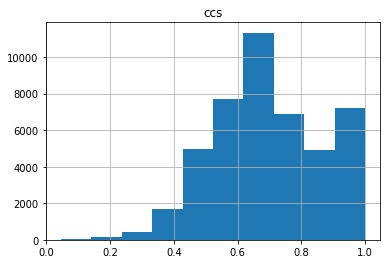

In [15]:
%matplotlib inline
dataf.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74227add50>]], dtype=object)

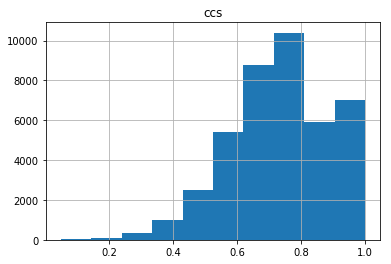

In [18]:
dataf = pd.read_csv('../data/exomecqa_refseq_target_reportable_gene.out', sep='\t', names=['chrom', 
                                                                               'gene', 'ccs'])
dataf.hist()

In [53]:
dataf = pd.read_csv('../data/exomecqa_refseq_target_reportable_exon.out', sep='\t', index_col=None,
                   names=['chr','start','end','gene','exon_num','strand',
                          'exon_id','exon_len','cohentcoverage','medMeanCov','MaxIdx','MinIdx',
                         'vertexes_','vertexes','peakFeatures', 'unevenness'])
dataf.head(10)
                                                                                           

,chr,start,end,gene,exon_num,strand,exon_id,exon_len,cohentcoverage,medMeanCov,MaxIdx,MinIdx,vertexes_,vertexes,peakFeatures,unevenness
0,1,247463797,247464578,NM_032752,2,-,2,781,0.998720,1.0,0,0,1,",1,-19,","|117.334,117.334,18|",5090.980
1,1,248512076,248512823,NM_001001918,2,+,2,747,0.998661,1.0,0,0,1,",1,-19,","|116.342,116.342,18|",4828.180
2,1,1179570,1179655,NM_001014980,10,-,8,85,0.988235,1.0,0,0,1,",1,-6,","|21.7949,21.7949,5|",370.513
3,1,1572769,1572875,NM_033487,20,-,8,106,0.990566,1.0,0,0,1,",1,-9,","|21.8235,21.8235,8|",289.162
4,1,6029146,6029319,NM_001291593,6,-,4,173,0.994220,1.0,0,0,1,",1,-13,","|25.3733,25.3733,12|",365.799
5,1,12320749,12320851,NM_018156,78,+,11,102,0.990196,1.0,0,0,1,",1,-9,","|21,21,8|",267.750
6,1,22150973,22151364,NM_001013693,11,+,11,391,0.997442,1.0,0,0,1,",1,-9,","|101.689,101.689,8|",4970.030
7,1,26607562,26607794,NM_031286,5,+,5,232,0.995690,1.0,0,0,1,",1,-16,","|29.7143,29.7143,15|",459.581
8,1,33160756,33161645,NM_001161708,7,-,6,889,0.998875,1.0,0,0,1,",1,-22,","|120.275,120.275,21|",5091.660
9,1,33291698,33292522,NR_135107,5,+,2,824,0.998786,1.0,0,0,1,",1,-21,","|118.915,118.915,20|",4899.280


In [57]:
# dataf.sort(['unevenness']).head(20)
dataf['ue_sqrt'] = np.sqrt(dataf['unevenness'])

/home/kevin/dev/bin/anaconda2/envs/sitta/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73f1144b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f73f1039810>]], dtype=object)

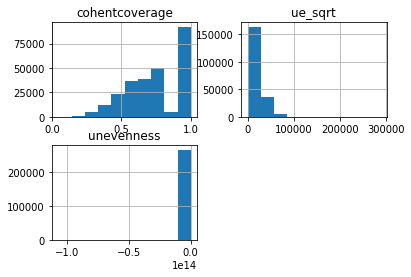

In [58]:
dataf.hist(['cohentcoverage', 'unevenness', 'ue_sqrt'])

(33, 16)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7400dbaf10>]], dtype=object)

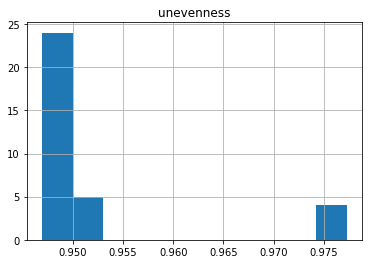

In [51]:
dataf_uneven = dataf[np.abs(dataf['unevenness'] - 1) < 0.15]#[dataf['cohentcoverage'] < 0.01 ]
print dataf_uneven.shape
dataf_uneven.hist('unevenness')

In [45]:
dataf[dataf['cohentcoverage'] < 0.01 ]

,chr,start,end,gene,exon_num,strand,exon_id,exon_len,cohentcoverage,medMeanCov,MaxIdx,MinIdx,vertexes_,vertexes,peakFeatures,unevenness
142362,19,57678786,57678796,NM_001012729,10,-,9,10,0.0,141722000.0,0,0,1,",1,-2,5,","|-1.54168e+08,-1.54168e+08,1|53,53,3|",-1.541680e+09
